## Data account understanding

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
import numpy as np
import data_understanding_utils as du
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
# not cut columns
pd.set_option('display.max_columns',None)

path= "./data/"
account_data = pd.read_csv(path+"account.csv", sep=';')

account_data

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102
...,...,...,...,...
4495,124,55,monthly issuance,971228
4496,3958,59,monthly issuance,971228
4497,777,30,monthly issuance,971228
4498,1573,63,monthly issuance,971229


### 2.2 Describe data



In [18]:
du.info_data(account_data,"shape","")
du.info_data(account_data,"head","")

(4500, 4)

   account_id  district_id         frequency    date
0         576           55  monthly issuance  930101
1        3818           74  monthly issuance  930101
2         704           55  monthly issuance  930101
3        2378           16  monthly issuance  930101
4        2632           24  monthly issuance  930102



#### Info about the dataset

In [19]:
du.info_data(account_data,"info","")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB
None



In [20]:
du.info_data(account_data,"isnull","")

Number of null values: 
 account_id     0
district_id    0
frequency      0
date           0
dtype: int64



In [21]:
res_duplicate = du.check_duplicates(account_data,"Disp",["account_id"])

No duplicates found in the data
Duplicated rows on Disp: 
Empty DataFrame
Columns: [account_id, district_id, frequency, date]
Index: []
Number of repeated values in Disp : Series([], dtype: int64)


No null values in the dataset or duplicate rows with the same account_id.

In the data preparation step, we need to create new features from the existing ones. For example to have the account age, maybe change how frequency atribute is represented and other usefull informations.

#### Statistical Summary

In [22]:
du.info_data(account_data,"describe","")


         account_id  district_id           date
count   4500.000000  4500.000000    4500.000000
mean    2786.067556    37.310444  951654.608667
std     2313.811984    25.177217   14842.188377
min        1.000000     1.000000  930101.000000
25%     1182.750000    13.000000  931227.000000
50%     2368.000000    38.000000  960102.000000
75%     3552.250000    60.000000  961101.000000
max    11382.000000    77.000000  971229.000000



### Data Summarization

We will merge the data from account.csv with loan_dev.csv so we can have a better understanding of the data as a whole and for our business goals.

In [24]:
loans = pd.read_csv (path+"loan_dev.csv", sep=';')
account_loans = pd.merge(loans, account_data ,on='account_id')
account_loans

,loan_id,account_id,date_x,amount,duration,payments,status,district_id,frequency,date_y
0,5314,1787,930705,96396,12,8033,-1,30,weekly issuance,930322
1,5316,1801,930711,165960,36,4610,1,46,monthly issuance,930213
2,6863,9188,930728,127080,60,2118,1,45,monthly issuance,930208
3,5325,1843,930803,105804,36,2939,1,12,monthly issuance,930130
4,7240,11013,930906,274740,60,4579,1,1,weekly issuance,930214
...,...,...,...,...,...,...,...,...,...,...
323,6818,9030,961212,155616,48,3242,1,72,monthly issuance,950121
324,5625,3189,961215,222180,60,3703,-1,29,monthly issuance,951129
325,6805,8972,961221,45024,48,938,1,70,monthly issuance,960521
326,7233,10963,961225,115812,36,3217,1,16,monthly issuance,950520


In the data preparation we also need to change the names of the columns to make it easier to understand, for example, we can change the column name "frequency" to "frequency_of_payments" and "date_x" to "date_loan", or even create new variables to get a more understandable date loan or date account.

/home/wolfcuanhamarws/Desktop/Faculdade/2023/AC/Project/AC-Project/Notebooks/data_understanding_utils.py:60: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cbar=True, cmap='coolwarm')


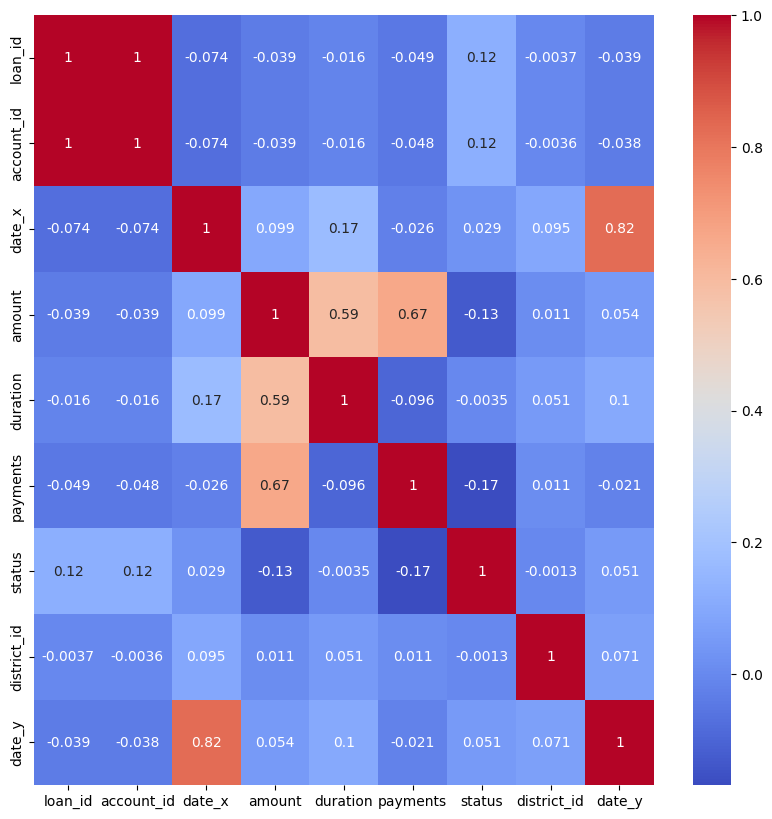

In [25]:
du.data_summarization(account_loans,"correlation")

After chante variables , names etc: check correlation between variables date_x and date_y, and others we thing are important.

Compare the variables wit plots and other information